Задание 1

In [1]:
import pandas as pd

In [2]:
movies_data = pd.read_csv("ml-latest-small/movies.csv")
movies_ratings = pd.read_csv("ml-latest-small/ratings.csv")

In [3]:
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
%%time

def movies_classification(movie_row):
    if movie_row['rating'] <= 2.0:
        return 'low'
    elif movie_row['rating'] <= 4.0:
        return 'mid'
    else:
        return 'high'


movies_ratings['rating_class'] = movies_ratings.apply(movies_classification, axis=1)


CPU times: total: 391 ms
Wall time: 845 ms


In [6]:
movies_ratings.head()

,userId,movieId,rating,timestamp,rating_class
0,1,31,2.5,1260759144,mid
1,1,1029,3.0,1260759179,mid
2,1,1061,3.0,1260759182,mid
3,1,1129,2.0,1260759185,low
4,1,1172,4.0,1260759205,mid


In [7]:
result_frame = (
    pd.merge(movies_data, movies_ratings)
    .groupby(["movieId", "title"])
    .agg({"rating": "mean", "rating_class": [set]})
    .reset_index()
)
result_frame.head()

,movieId,title,rating,rating_class
,,,mean,set
0,1,Toy Story (1995),3.872470,"{high, mid, low}"
1,2,Jumanji (1995),3.401869,"{low, mid, high}"
2,3,Grumpier Old Men (1995),3.161017,"{high, mid, low}"
3,4,Waiting to Exhale (1995),2.384615,"{low, mid}"
4,5,Father of the Bride Part II (1995),3.267857,"{high, mid, low}"


Задание 2

In [8]:
keywords_data = pd.read_csv("ml-latest-small/keywords.csv")

geo_data = {
    "Центр": ["москва", "тула", "ярославль"],
    "Северо-Запад": ["петербург", "псков", "мурманск"],
    "Дальний Восток": ["владивосток", "сахалин", "хабаровск"],
}
keywords_data.head(5)

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [9]:
%%time

def region_detector(keyword_row):
    keywords_line = keyword_row.strip().split()
    for region, cities in geo_data.items():
        for keyword in keywords_line:
            if keyword.lower() in cities:
                return region
    return "undefined"


keywords_data["region"] = keywords_data["keyword"].apply(region_detector)

keywords_data.head()

CPU times: total: 93.8 ms
Wall time: 237 ms


,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [10]:
keywords_data[keywords_data.region != "undefined"].head()

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток
1236,банк санкт петербург,174375,Северо-Запад


Задание 3

In [11]:
movies_data = pd.read_csv("ml-latest-small/movies.csv")
movies_ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies_data = movies_data.join(
    movies_ratings.set_index("movieId"), on="movieId", how="left"
)
movies_data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,8.518667e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,9.386292e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1.331380e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,9.979383e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,8.551901e+08


In [12]:
%%time

years = range(1950, 2023)


def year_detector(movie_row):
    for year in years:
        if str(year) in movie_row["title"]:
            return year
    return 1900


movies_data["year"] = movies_data.apply(year_detector, axis=1)

movies_data.tail(10)

CPU times: total: 6.88 s
Wall time: 10.9 s


,movieId,title,genres,userId,rating,timestamp,year
9115,161830,Body (2015),Drama|Horror|Thriller,624.0,1.0,1.472493e+09,2015
9116,161918,Sharknado 4: The 4th Awakens (2016),Action|Adventure|Horror|Sci-Fi,624.0,1.5,1.472930e+09,2016
9117,161944,The Last Brickmaker in America (2001),Drama,287.0,5.0,1.470168e+09,2001
9118,162376,Stranger Things,Drama,73.0,4.5,1.474256e+09,1900
9119,162542,Rustom (2016),Romance|Thriller,611.0,5.0,1.471521e+09,2016
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,611.0,3.0,1.471524e+09,2016
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,NaN,NaN,NaN,2016
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,547.0,5.0,1.476419e+09,2016
9123,164977,The Gay Desperado (1936),Comedy,NaN,NaN,NaN,1900
9124,164979,"Women of '69, Unboxed",Documentary,NaN,NaN,NaN,1900


In [55]:
mdr = (
    movies_data[["year", "rating"]]
    .groupby("year")
    .mean()
    .sort_values("rating", ascending=False)
)
mdr.head()
# чет не похоже на правду =))

,rating
year,
1957,4.014241
1972,4.011136
1952,4.000000
1954,3.994220
1951,3.983539


In [14]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
mdr = mdr.reset_index()
mdr = mdr[mdr.year > 1900]
mdr = mdr.sort_values("year", ascending=True)
mdr.head()

,year,rating
8,1950,3.915254
4,1951,3.983539
2,1952,4.000000
21,1953,3.754587
3,1954,3.994220


<Axes: xlabel='year'>

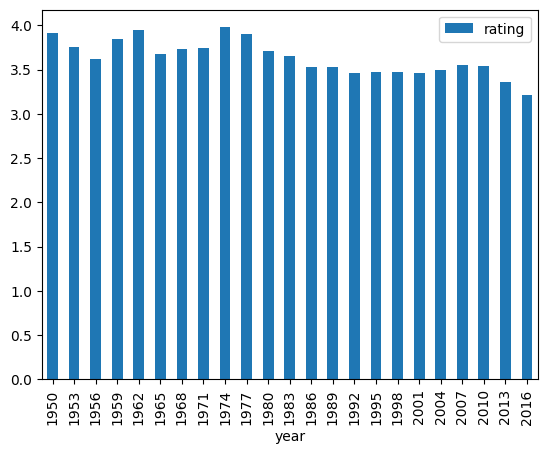

In [59]:
mdr[::3].plot(y="rating", x="year", kind="bar")  # ну почти доказано :)